## Handling Non Linearly separable dataset

In [1]:
#prepare dataset
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

X,Y=make_circles(n_samples=500,noise=0.02)
print(X.shape,Y.shape)

(500, 2) (500,)


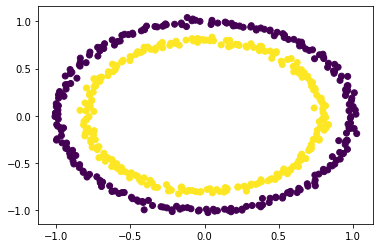

In [2]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [3]:
#Non-linear transformation
def phi(X):
    X1=X[:,0]
    X2=X[:,1]
    X3=X1**2 + X2**2
    X_=np.zeros((X.shape[0],3))
    print(X_.shape)
    X_[:,:-1]=X
    X_[:,-1]=X3
    return X_

X_=phi(X)

(500, 3)


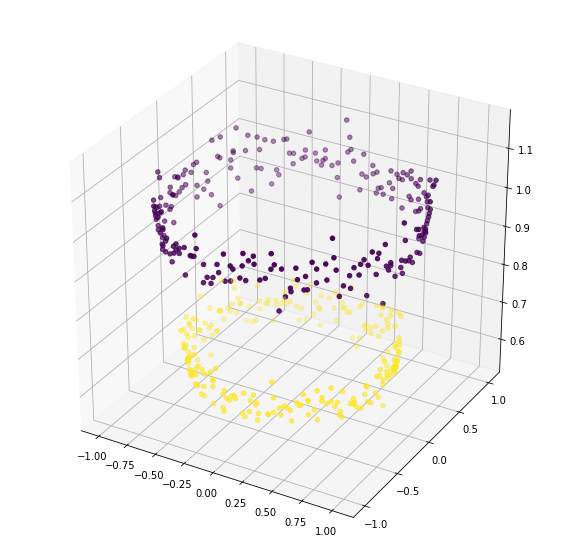

In [21]:
def plot3d(X,show=True):
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    X1=X[:,0]
    X2=X[:,1]
    X3=X[:,2]
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    if(show==True):
        plt.show()
    return ax
    
plot3d(X_)    

### Logistic Classifier

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr=LogisticRegression()

In [6]:
#for 2D space
acc=cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy of X(2D) is %.4f"%(acc*100))

Accuracy of X(2D) is 47.8000


/home/muskan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/muskan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/muskan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/muskan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/muskan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

In [7]:
#for Higher Dimension - 3D space
acc=cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy of X(3D) is %.4f"%(acc*100))

Accuracy of X(3D) is 100.0000


/home/muskan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/muskan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/muskan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/muskan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/muskan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

### Visualize the decision surface

In [8]:
lr.fit(X_,Y)

/home/muskan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
wts=lr.coef_
print(wts)

[[ 0.01274922 -0.02982552 -8.8989448 ]]


In [10]:
bias=lr.intercept_
print(bias)

[7.18642412]


In [11]:
xx,yy=np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [12]:
z=-1*(wts[0,0]*xx + wts[0,1]*yy + bias)/wts[0,2]
print(z)

[[0.81139695 0.81282962 0.81426229 0.81569495]
 [0.80804538 0.80947804 0.81091071 0.81234337]
 [0.8046938  0.80612646 0.80755913 0.8089918 ]
 [0.80134222 0.80277488 0.80420755 0.80564022]]


Axes3DSubplot(0.125,0.125;0.775x0.755)


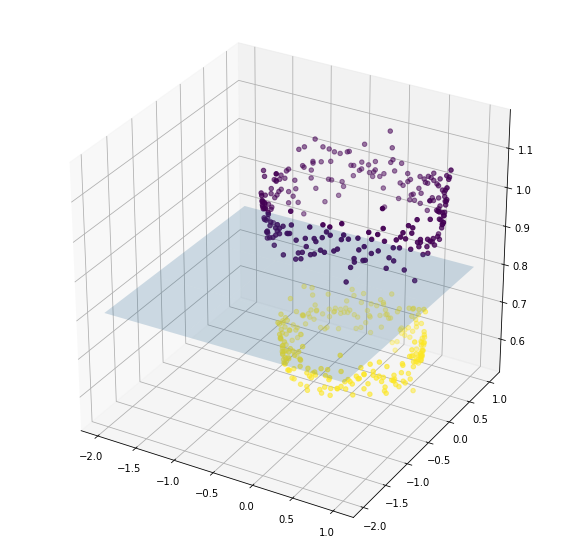

In [24]:
ax=plot3d(X_,False)
print(ax)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

## SVM kernel based classifiers

In [14]:
#default-rbf kernel
from sklearn import svm
svc=svm.SVC(gamma="scale")
svc.fit(X,Y)
svc.score(X,Y)

1.0

In [15]:
#linear kernel
svc=svm.SVC(kernel="linear",gamma="scale")
svc.fit(X,Y)
svc.score(X,Y)

0.498

In [16]:
#poly kernel 
svc=svm.SVC(kernel="poly",gamma="auto")
svc.fit(X,Y)
svc.score(X,Y)

0.53

In [17]:
#rbf kernel
svc=svm.SVC(kernel="rbf",gamma="auto")
svc.fit(X,Y)
svc.score(X,Y)

1.0

In [18]:
#sigmoid kernel
svc=svm.SVC(kernel="sigmoid",gamma="auto")
svc.fit(X,Y)
svc.score(X,Y)

0.502

In [19]:
#custom kernel
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc=svm.SVC(kernel=custom_kernel,gamma="auto")
svc.fit(X,Y)
svc.score(X,Y)

1.0